# Histograms, Binnings, and Density

A histogram groups data into ranges (bins) and shows how often values fall into each range. Each bar represents a range of values, and its height tells us how many data points are in that range. This helps us understand the shape and spread of the data.

# Understanding Histograms

## Bars Represent Frequency:
- Each bar represents a **range of values** (a bin).
- The **height** of the bar shows how many data points fall within that range.

## X-Axis (Bins):
- The X-axis is divided into **intervals** or **ranges** of values.

## Y-Axis (Frequency):
- The Y-axis shows how many **data points** fall into each bin.

---

## Everyday Example:
Imagine you’re recording the heights of students in a class:
1. **Divide the heights into ranges** (e.g., 150–160 cm, 160–170 cm, etc.).
2. **Count how many students** fall into each range.
3. **Draw a bar** for each range where:
   - The **range** is represented on the X-axis.
   - The **number of students** is represented by the height of the bar.

The result is a **histogram**!


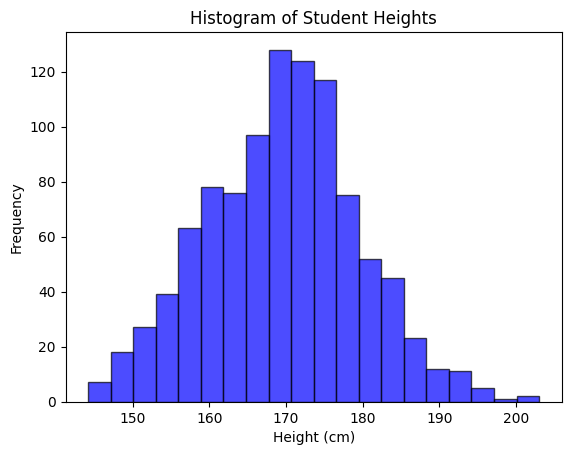

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data (e.g., heights of 1000 students)
data = np.random.normal(170, 10, 1000)  # Mean = 170 cm, Std Dev = 10 cm

# Create a histogram
plt.hist(data, bins=20, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Student Heights")

# Show the plot
plt.show()

[170.75696541 161.55220145 177.58588411 194.9079165  186.83267103
 186.23978665 176.61692002 149.70056124 170.17180458 162.98777691
 157.18851367 174.92772098 161.80182869 169.14187901 173.11359263
 179.65116313 156.86500773 176.19633033 179.57860287 169.13834026
 154.52673529 175.66431883 168.9341646  157.55532817 148.96374667
 185.09803686 174.15111906 178.35133273 144.74671711 157.09451175
 167.28214562 166.86029875 170.91244859 166.33188469 164.8372735
 172.38207859 167.81548895 182.23324838 172.77318489 181.54256683
 160.42669586 157.69220752 164.52280504 166.91408057 161.46745644
 152.35785889 178.75327681 183.33804284 163.00479821 171.55766194
 152.25393202 154.25384258 170.73066857 160.21954618 172.63995138
 176.32666545 169.85431386 155.55276458 181.03359301 165.00445609
 154.68835154 167.87037081 173.01183328 176.68466938 168.87454128
 171.71748344 173.1956221  167.62049226 189.29157478 192.29292731
 160.83156228 177.95257705 177.41232555 175.952123   152.48219133
 174.238669

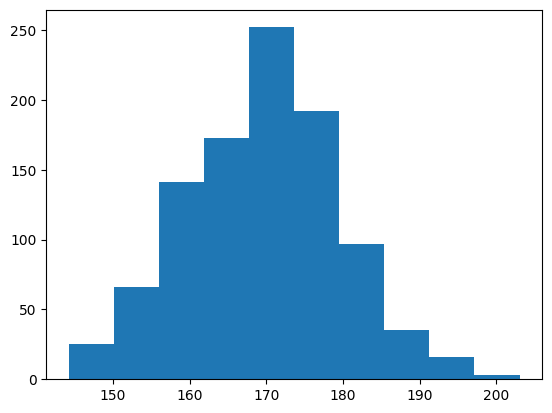

In [4]:
print (data)
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

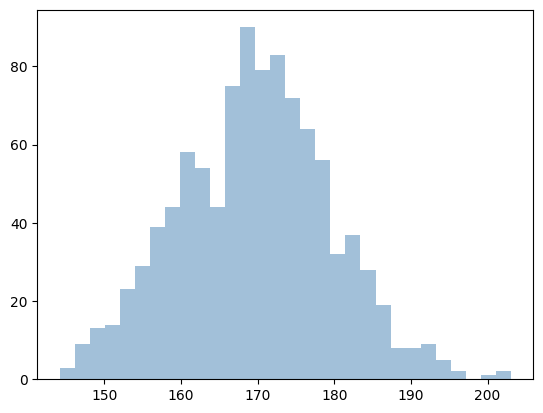

In [3]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

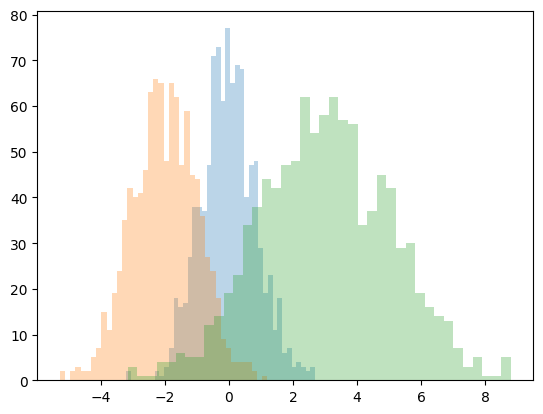

In [5]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3,  bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [6]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 91 314 444 132  19]


## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

In [7]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

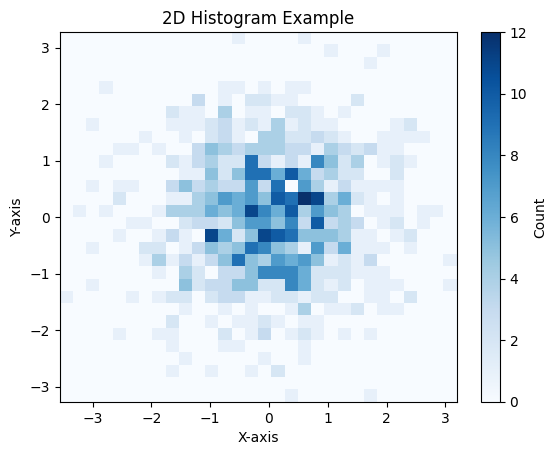

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random data
x = np.random.randn(1000)  # 1000 random X-coordinates
y = np.random.randn(1000)  # 1000 random Y-coordinates

# Step 2: Create a 2D histogram
# Divide into 30x30 grids, use "Blues" color map
plt.hist2d(x, y, bins=30, cmap='Blues')

# Step 3: Add a color bar
# The color bar shows the density (number of points in each bin)
plt.colorbar(label='Count')

# Step 4: Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Histogram Example')

# Step 5: Show the plot
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 random ages for the example
data = np.random.randint(18, 65, 1000)  # Random ages between 18 and 65

# Create a histogram
plt.hist(data, bins=10, color='skyblue', edgecolor='black')

# Add labels
plt.title('Histogram of Ages')
plt.xlabel('Age Range')
plt.ylabel('Number of People')

# Show the plot
plt.show()


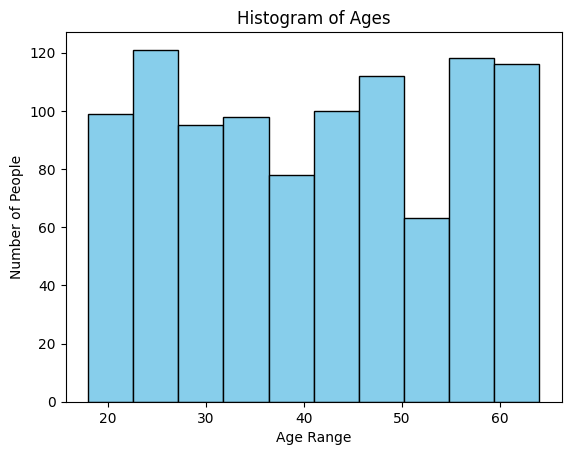

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 random ages for the example
data = np.random.randint(18, 65, 1000)  # Random ages between 18 and 65

# Create a histogram
plt.hist(data, bins=10, color='skyblue', edgecolor='black')

# Add labels
plt.title('Histogram of Ages')
plt.xlabel('Age Range')
plt.ylabel('Number of People')

# Show the plot
plt.show()


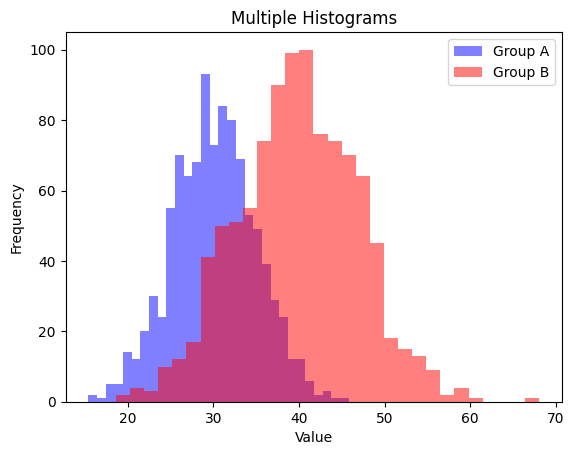

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for two groups
# Group A (mean=30, std=5)
group_a = np.random.normal(loc=30, scale=5, size=1000)
# Group B (mean=40, std=7)
group_b = np.random.normal(loc=40, scale=7, size=1000)

# Create the histograms
plt.hist(group_a, bins=30, alpha=0.5, label='Group A',
         color='blue')  # Histogram for Group A
plt.hist(group_b, bins=30, alpha=0.5, label='Group B',
         color='red')   # Histogram for Group B

# Add title and labels
plt.title('Multiple Histograms')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

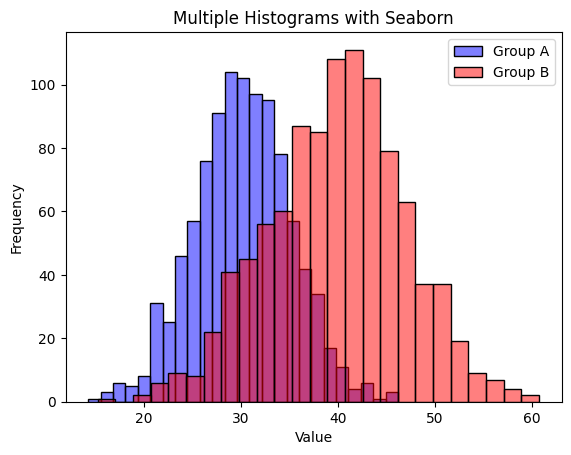

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random data for two groups
# Group A (mean=30, std=5)
group_a = np.random.normal(loc=30, scale=5, size=1000)
# Group B (mean=40, std=7)
group_b = np.random.normal(loc=40, scale=7, size=1000)

# Combine the data into one DataFrame
data = pd.DataFrame({
    'Group A': group_a,
    'Group B': group_b
})

# Plot the histograms using seaborn
sns.histplot(data['Group A'], kde=False,
             color='blue', label='Group A', alpha=0.5)
sns.histplot(data['Group B'], kde=False,
             color='red', label='Group B', alpha=0.5)

# Add title and labels
plt.title('Multiple Histograms with Seaborn')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

2d Histogram

In [ ]:
plt.hexbin

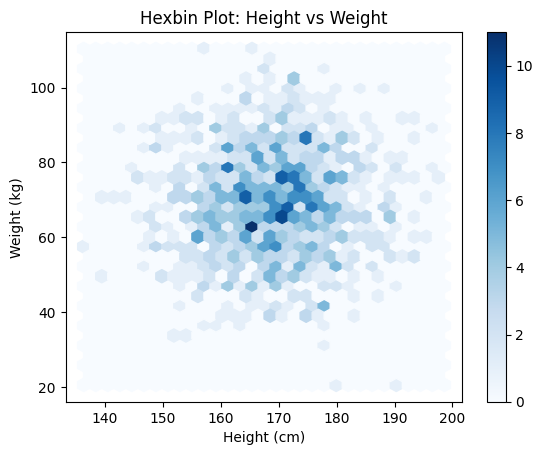

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for two variables (e.g., height vs weight)
x = np.random.normal(170, 10, 1000)  # Height data (mean=170, std=10)
y = np.random.normal(70, 15, 1000)   # Weight data (mean=70, std=15)

# Create the hexbin plot
# gridsize controls the size of the hexagons
plt.hexbin(x, y, gridsize=30, cmap='Blues')

# Add a color bar to show the density scale
plt.colorbar()

# Add labels and title
plt.title('Hexbin Plot: Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

# Show the plot
plt.show()

# Understanding KDE Plot

## 1. What is a KDE Plot?
- A **KDE plot** is a smooth curve that shows how data is distributed.
- It’s like a **smoothed-out histogram**.
- Instead of bars like in a histogram, it uses a **line** to represent the density of data points.

---

## 2. Everyday Analogy
- Imagine you’re tracking the **heights of students** in a classroom:
  - A **histogram** groups the students' heights into ranges (bins), like 150–160 cm, 160–170 cm, etc.
  - A **KDE plot** smooths out the jaggedness of the histogram and gives a continuous curve to show where most students' heights are concentrated.

---

## 3. Why Use a KDE Plot?

### Understand the Shape:
- Helps you see the overall **pattern of the data**.
- Is the data centered around a specific value? Is it spread out? Are there multiple peaks?

### Smooth Visuals:
- A KDE plot is **smoother** and easier to read compared to a histogram.

---

## 4. Key Characteristics

### **X-axis**:
- Shows the **range of values** (e.g., heights in cm).

### **Y-axis**:
- Represents the **density** of data points.
- **Taller parts of the curve** mean more data points are in that range.

### **Area Under the Curve**:
- Always equals **1**, representing 100% of the data.


C:\Users\91973\AppData\Local\Temp\ipykernel_8360\337114405.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='blue')


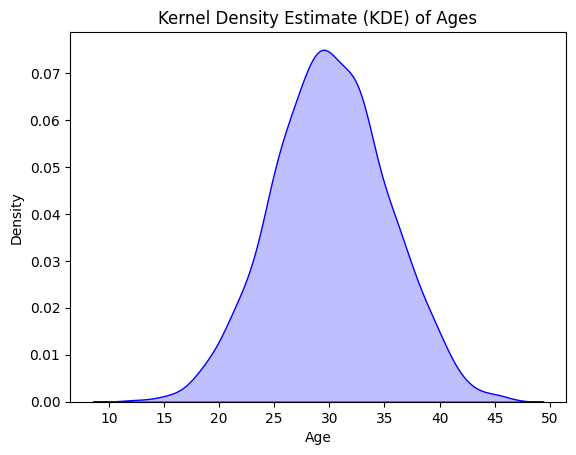

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random data: ages of 1000 people (normal distribution)
# loc = mean, scale = std dev
data = np.random.normal(loc=30, scale=5, size=1000)

# Create a Kernel Density Estimate plot
sns.kdeplot(data, shade=True, color='blue')

# Add labels and title
plt.title('Kernel Density Estimate (KDE) of Ages')
plt.xlabel('Age')
plt.ylabel('Density')

# Show the plot
plt.show()